Files already downloaded and verified
Class Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


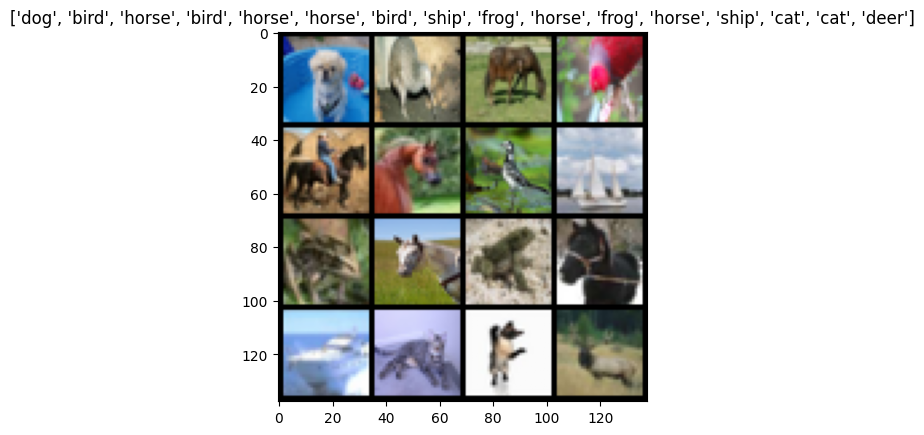

Image Dimensions: torch.Size([16, 3, 32, 32])


Epoch 1/15: 100%|██████████| 63/63 [00:00<00:00, 162.73it/s]


Epoch [1/15], Loss: 2.2128, Accuracy: 17.00%


Epoch 2/15: 100%|██████████| 63/63 [00:00<00:00, 201.25it/s]


Epoch [2/15], Loss: 1.8811, Accuracy: 30.20%


Epoch 3/15: 100%|██████████| 63/63 [00:00<00:00, 205.41it/s]


Epoch [3/15], Loss: 1.6816, Accuracy: 39.10%


Epoch 4/15: 100%|██████████| 63/63 [00:00<00:00, 211.91it/s]


Epoch [4/15], Loss: 1.5470, Accuracy: 44.20%


Epoch 5/15: 100%|██████████| 63/63 [00:00<00:00, 220.25it/s]


Epoch [5/15], Loss: 1.3593, Accuracy: 49.40%


Epoch 6/15: 100%|██████████| 63/63 [00:00<00:00, 224.09it/s]


Epoch [6/15], Loss: 1.1313, Accuracy: 60.70%


Epoch 7/15: 100%|██████████| 63/63 [00:00<00:00, 222.03it/s]


Epoch [7/15], Loss: 0.9771, Accuracy: 64.90%


Epoch 8/15: 100%|██████████| 63/63 [00:00<00:00, 215.25it/s]


Epoch [8/15], Loss: 0.7607, Accuracy: 72.70%


Epoch 9/15: 100%|██████████| 63/63 [00:00<00:00, 214.56it/s]


Epoch [9/15], Loss: 0.5826, Accuracy: 79.10%


Epoch 10/15: 100%|██████████| 63/63 [00:00<00:00, 216.90it/s]


Epoch [10/15], Loss: 0.4194, Accuracy: 86.40%


Epoch 11/15: 100%|██████████| 63/63 [00:00<00:00, 208.33it/s]


Epoch [11/15], Loss: 0.3058, Accuracy: 92.10%


Epoch 12/15: 100%|██████████| 63/63 [00:00<00:00, 215.47it/s]


Epoch [12/15], Loss: 0.1955, Accuracy: 94.60%


Epoch 13/15: 100%|██████████| 63/63 [00:00<00:00, 208.34it/s]


Epoch [13/15], Loss: 0.1096, Accuracy: 98.20%


Epoch 14/15: 100%|██████████| 63/63 [00:00<00:00, 209.61it/s]


Epoch [14/15], Loss: 0.0646, Accuracy: 98.90%


Epoch 15/15: 100%|██████████| 63/63 [00:00<00:00, 210.64it/s]


Epoch [15/15], Loss: 0.0340, Accuracy: 99.80%
Training Complete!
Classification Report:
              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00       111
  automobile       1.00      1.00      1.00        95
        bird       1.00      1.00      1.00       104
         cat       1.00      1.00      1.00        96
        deer       1.00      1.00      1.00        90
         dog       1.00      1.00      1.00       104
        frog       1.00      1.00      1.00        96
       horse       1.00      1.00      1.00       100
        ship       1.00      1.00      1.00       100
       truck       1.00      1.00      1.00       104

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



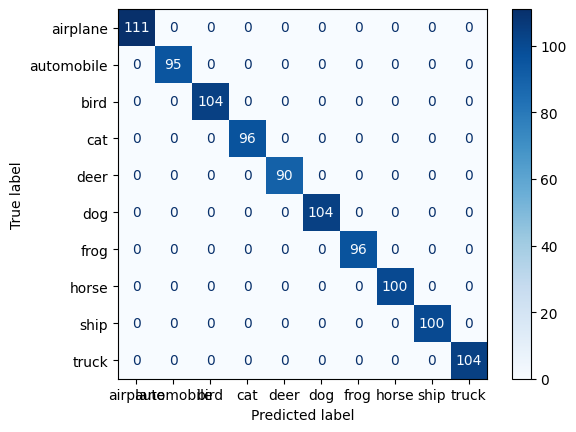

In [56]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, Subset
import random
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import cv2
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random.seed(42)

# Gaussian filter function
def gaussian_filter(image):
    image_np = image.permute(1, 2, 0).numpy()
    blurred = cv2.GaussianBlur(image_np, (5, 5), 0)
    return torch.from_numpy(blurred).permute(2, 0, 1)

# Custom transform including Gaussian filter
class GaussianFilterTransform:
    def __call__(self, img):
        return gaussian_filter(img)

# CIFAR-10 dataset transformation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
subset_size = int(0.02 * len(dataset))
indices = random.sample(range(len(dataset)), subset_size)
subset = Subset(dataset, indices)

class_names = dataset.classes
print("Class Names:", class_names)

data_loader = torch.utils.data.DataLoader(subset, batch_size=16, shuffle=True)

# Function to display images
def show_images(images, labels):
    images = make_grid(images, nrow=4)
    npimg = images.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)
    plt.title([class_names[label] for label in labels])
    plt.show()

# Display a batch of images
images, labels = next(iter(data_loader))
show_images(images, labels)
print("Image Dimensions:", images.shape)

# Adjusted CNN for CIFAR-10 (32x32 images)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = len(class_names)
model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 15
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete!")
torch.save(model.state_dict(), 'classifier_cnn_model_cifar10.pt')

# Test model
def test_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Testing on the same data
test_model(model, data_loader)

# Pixel attack for CIFAR-10


In [61]:
# Pixel attack for CIFAR-10
import torch.nn.functional as F

def random_pixel_attack(image, label, model, bounds):
    pixel_x = np.random.randint(bounds[0][0], bounds[0][1])
    pixel_y = np.random.randint(bounds[1][0], bounds[1][1])
    pixel_value = np.random.uniform(bounds[2][0], bounds[2][1], size=3)
    
    perturbed_image = image.clone()
    perturbed_image[0, :, pixel_x, pixel_y] = torch.tensor(pixel_value, device=image.device)
    
    with torch.no_grad():
        output = model(perturbed_image)
    
    loss = -F.cross_entropy(output, torch.tensor([label], device=image.device))
    return pixel_x, pixel_y, pixel_value, loss.item()

bounds = [(0, 31), (0, 31), (0, 1), (0, 1), (0, 1)]  # CIFAR-10 images are 32x32

model.eval()

attacked_images = []
patch_data = []

batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

for batch_idx, (images, labels) in tqdm(enumerate(data_loader), total=len(data_loader), desc="Attacking images"):
    images = images.to(device)
    labels = labels.to(device)
    
    for i in range(images.size(0)):
        image = images[i].unsqueeze(0)
        label = labels[i]
        
        pixel_x, pixel_y, pixel_value, _ = random_pixel_attack(image, label, model, bounds)
        attacked_image = image.clone()
        attacked_image[0, :, pixel_x, pixel_y] = torch.tensor(pixel_value, device=image.device)
        
        attacked_images.append((attacked_image.cpu().squeeze(), label.item()))
        
        patch_size = 8  # CIFAR-10, we now use 8x8 patches
        for row in range(0, 32, patch_size):
            for col in range(0, 32, patch_size):
                patch = attacked_image[:, :, row:row+patch_size, col:col+patch_size]
                patch_id = f"[{batch_idx * batch_size + i}][{row//patch_size * 4 + col//patch_size}]"
                attacked_or_not = 1 if (row <= pixel_x < row + patch_size and col <= pixel_y < col + patch_size) else 0
                patch_data.append((patch.cpu().squeeze(), patch_id, attacked_or_not))

torch.save(attacked_images, 'cifar10_attacked.pt')
torch.save(patch_data, 'patch_data_cifar10.pt')

Attacking images: 100%|██████████| 63/63 [00:03<00:00, 16.01it/s]


In [57]:
import torch
import torch.nn.functional as F
import numpy as np
from scipy.optimize import differential_evolution
from tqdm import tqdm

def one_pixel_attack(image, label, model, bounds, maxiter=20):
    def perturb_pixel(pixel):
        perturbed_image = image.clone()
        perturbed_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        with torch.no_grad():
            output = model(perturbed_image)
        loss = -F.cross_entropy(output, torch.tensor([label], device=image.device))
        return loss.item()
    
    result = differential_evolution(perturb_pixel, bounds=bounds, maxiter=maxiter, popsize=10)
    return result.x

# Adjusted bounds for 32x32 images
bounds = [(0, 31), (0, 31), (0, 1), (0, 1), (0, 1)]  

model.eval()

cifar10_attacked = []
patch_data = []

batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

for batch_idx, (images, labels) in tqdm(enumerate(dataloader), total=len(dataloader), desc="Attacking images"):
    images = images.to(device)
    labels = labels.to(device)
    
    for i in range(images.size(0)):
        image = images[i].unsqueeze(0)
        label = labels[i]
        
        pixel = one_pixel_attack(image, label, model, bounds)
        attacked_image = image.clone()
        attacked_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        
        cifar10_attacked.append((attacked_image.cpu().squeeze(), label.item()))
        
        patch_size = 8  # Changed to 8x8 patches
        for row in range(0, 32, patch_size):
            for col in range(0, 32, patch_size):
                patch = attacked_image[:, :, row:row+patch_size, col:col+patch_size]
                patch_id = f"[{batch_idx * batch_size + i}][{row//patch_size * 4 + col//patch_size}]"
                attacked_or_not = 1 if (row <= pixel[0] < row + patch_size and col <= pixel[1] < col + patch_size) else 0
                patch_data.append((patch.cpu().squeeze(), patch_id, attacked_or_not))

torch.save(cifar10_attacked, 'cifar10-attacked.pt')
torch.save(patch_data, 'patch-data-cifar10.pt')

Attacking images:   0%|          | 0/1563 [00:00<?, ?it/s]

Attacking images:   0%|          | 0/1563 [00:20<?, ?it/s]


KeyboardInterrupt: 

In [62]:
import torch

dog_breeds_attacked = torch.load('cifar10_attacked.pt')
patch_data = torch.load('patch_data_cifar10.pt')

num_attacked_samples = len(dog_breeds_attacked)
num_patch_samples = len(patch_data)
num_originl_samples = len(subset)

print(f'Total number of samples in animals-attacked.pt: {num_attacked_samples}')
print(f'Total number of samples in Patch-data.pt: {num_patch_samples}')
print(f'Total number of samples in original dataset: {num_originl_samples}')

Total number of samples in animals-attacked.pt: 1000
Total number of samples in Patch-data.pt: 16000
Total number of samples in original dataset: 1000


Testing attacked dataset:   0%|          | 0/1000 [00:00<?, ?it/s]

Testing attacked dataset: 100%|██████████| 1000/1000 [00:01<00:00, 575.25it/s]


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00       104
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        90
           5       1.00      1.00      1.00       104
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       104

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



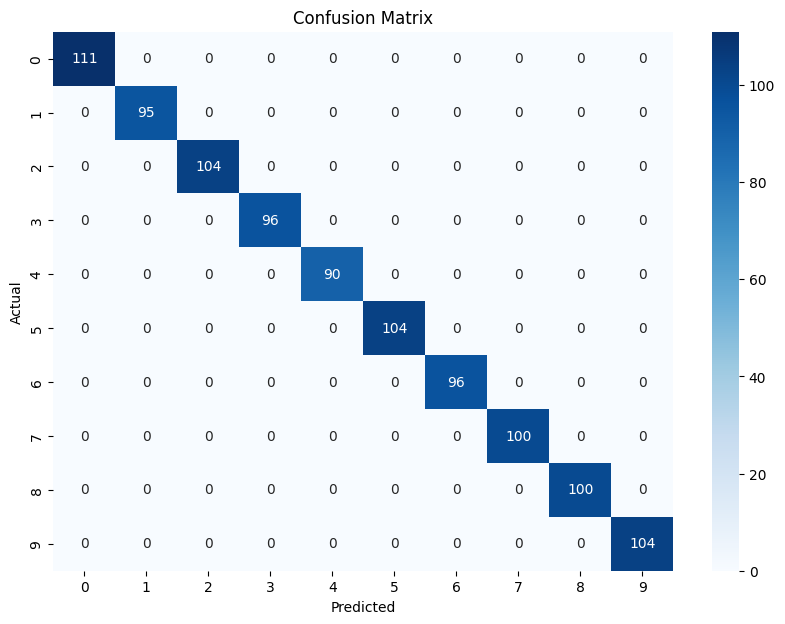

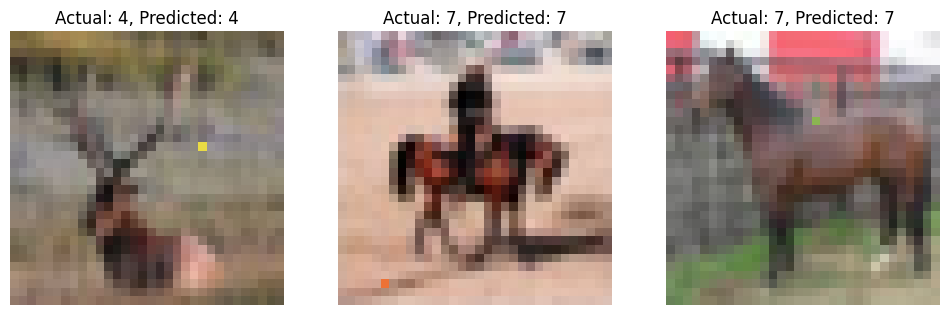

In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

dog_breeds_attacked = torch.load('cifar10_attacked.pt')

model.eval()

all_preds = []
all_labels = []
loss_fn = torch.nn.CrossEntropyLoss()

with torch.no_grad():
    for attacked_image, label in tqdm(dog_breeds_attacked, desc="Testing attacked dataset"):
        attacked_image = attacked_image.unsqueeze(0).to(device)
        label = torch.tensor(label).to(device)  
        
        output = model(attacked_image)
        loss = loss_fn(output, label.unsqueeze(0))  
        
        _, predicted = torch.max(output, 1)
        
        all_preds.append(predicted.item())
        all_labels.append(label.item())

accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Classification Report:")
print(classification_report(all_labels, all_preds))

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


random_indices = np.random.choice(len(dog_breeds_attacked), size=3, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    attacked_image, label = dog_breeds_attacked[idx]
    attacked_image = attacked_image.permute(1, 2, 0) 
    attacked_image = attacked_image.numpy()

    predicted = all_preds[idx]
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(attacked_image)
    plt.title(f'Actual: {label}, Predicted: {predicted}')
    plt.axis('off')

plt.show()


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import numpy as np
import cv2
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define a new CNN architecture suitable for CIFAR-10 patches
class PatchCNN(nn.Module):
    def __init__(self):
        super(PatchCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the size of the tensor after convolutions and pooling
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            self.pool,
            nn.ReLU(),
            self.conv2,
            self.pool,
            nn.ReLU(),
            self.conv3,
            self.pool,
            nn.ReLU()
        )
        self._calculate_conv_output_size()

        self.fc1 = nn.Linear(self._to_linear, 256)
        self.fc2 = nn.Linear(256, 2)

    def _calculate_conv_output_size(self):
        """ Calculate the size of the tensor after convolutions and pooling """
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 8, 8)  # Assuming input size is (3, 8, 8)
            dummy_output = self.convs(dummy_input)
            self._to_linear = int(np.prod(dummy_output.size()))

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the dataset class for CIFAR-10 patches
class PatchDataset(Dataset):
    def __init__(self, patch_data):
        self.patches = patch_data

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch, patch_id, attacked_or_not = self.patches[idx]
        return patch.float(), attacked_or_not  

# Load the CIFAR-10 patch data
patch_data = torch.load('patch_data_cifar10.pt')  # Adjusted file name
dataset = PatchDataset(patch_data)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Setup device, model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(total=len(data_loader), desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
        for patches, labels in data_loader:
            patches, labels = patches.to(device), labels.to(device)

            outputs = model(patches)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss / (pbar.n + 1), accuracy=correct / total)
            pbar.update(1)

    avg_loss = running_loss / len(data_loader)
    accuracy = correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

# Repair algorithm functions
def color_difference(a, b):
    return torch.abs(a[0] - b[0]) + torch.abs(a[1] - b[1]) + torch.abs(a[2] - b[2])

def generate_difference_map(patch):
    lambda_map = torch.zeros((8, 8), device=patch.device)
    ct = 125 / 255.0  # color threshold, normalized to 0-1 range

    for i in range(8):
        for j in range(8):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 8 and 0 <= nj < 8:
                        neighbors.append(patch[:, ni, nj])
            
            diff_count = sum(color_difference(patch[:, i, j], neighbor) > ct for neighbor in neighbors)
            lambda_map[i, j] = diff_count / len(neighbors) * 10

    return lambda_map

def generate_average_map(patch, lambda_map):
    epsilon_map = torch.zeros((8, 8, 3), device=patch.device)
    at = 9  # average threshold

    for i in range(8):
        for j in range(8):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 8 and 0 <= nj < 8 and lambda_map[ni, nj] < at:
                        neighbors.append(patch[:, ni, nj])
            
            if neighbors:
                epsilon_map[i, j] = torch.stack(neighbors).mean(dim=0)
            else:
                epsilon_map[i, j] = patch[:, i, j]

    return epsilon_map

def reconstruct_patch(patch, lambda_map, epsilon_map):
    rt = 8  # replacement threshold
    reconstructed_patch = patch.clone()

    for i in range(8):
        for j in range(8):
            if lambda_map[i, j] > rt:
                reconstructed_patch[:, i, j] = epsilon_map[i, j]

    return reconstructed_patch

def repair_patch(patch):
    lambda_map = generate_difference_map(patch)
    epsilon_map = generate_average_map(patch, lambda_map)
    return reconstruct_patch(patch, lambda_map, epsilon_map)

def detect_attacked_patch(image, model):
    patch_size = 8
    patches = []
    patch_probs = []

    for row in range(0, 32, patch_size):
        for col in range(0, 32, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def repair_images(attacked_images, model, device):
    repaired_images = []

    for attacked_image, label in tqdm(attacked_images, desc="Repairing images"):
        attacked_image = attacked_image.to(device)
        
        attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image.unsqueeze(0), model)
        
        repaired_patch = repair_patch(attacked_patch.squeeze(0))
        
        row = (attacked_patch_index // 4) * 8
        col = (attacked_patch_index % 4) * 8
        attacked_image[:, row:row + 8, col:col + 8] = repaired_patch
        
        repaired_images.append((attacked_image.cpu(), label))

    return repaired_images

# Main script
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN-cifar.pt'))

# Load attacked images
attacked_images = torch.load('cifar10_attacked.pt')  # Adjusted file name

# Repair images
repaired_images = repair_images(attacked_images, model, device)

# Load the classifier model
num_classes = 10  # CIFAR-10 has 10 classes
classifier_model = SimpleCNN(num_classes).to(device)  # Ensure SimpleCNN is updated for CIFAR-10
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in tqdm(repaired_images, desc="Evaluating repaired images"):
        repaired_image = repaired_image.unsqueeze(0).to(device)
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(num_classes)]))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display 5 random repaired images with predicted and actual classes, alongside the attacked images
random_indices = random.sample(range(len(repaired_images)), 5)

for idx in random_indices:
    attacked_image, label = attacked_images[idx]
    repaired_image, _ = repaired_images[idx]
    
    attacked_image_np = attacked_image.cpu().numpy().transpose(1, 2, 0)
    repaired_image_np = repaired_image.cpu().numpy().transpose(1, 2, 0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(attacked_image_np)
    ax1.set_title("Attacked Image")
    ax1.axis('off')
    
    ax2.imshow(repaired_image_np)
    ax2.set_title(f"Repaired Image\nActual: {label}, Predicted: {predicted_labels[idx]}")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()



Epoch 1/2: 100%|██████████| 500/500 [00:02<00:00, 230.74it/s, accuracy=0.937, loss=0.248]


Epoch [1/2], Loss: 0.2484, Accuracy: 93.74%


Epoch 2/2: 100%|██████████| 500/500 [00:02<00:00, 238.23it/s, accuracy=0.938, loss=0.235]


Epoch [2/2], Loss: 0.2349, Accuracy: 93.75%


Repairing images: 100%|██████████| 1000/1000 [04:49<00:00,  3.45it/s]


RuntimeError: Error(s) in loading state_dict for SimpleCNN:
	size mismatch for fc1.weight: copying a param with shape torch.Size([512, 65536]) from checkpoint, the shape in current model is torch.Size([512, 4096]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([9, 512]) from checkpoint, the shape in current model is torch.Size([10, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([9]) from checkpoint, the shape in current model is torch.Size([10]).

In [31]:
# Save the trained model
torch.save(model.state_dict(), 'patchCNN-cifar.pt')
